In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pprint
import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import operator
import community as community
import calysto

### Introduction

I decided to work on the network of the connection between marvel's comics characters. Each node represents one marvel character that appears in one of the marvel comics and one edge represents the fact that two characters are together present in at least one comic. Notice that characters could be heroes as villains. 

I wanted to work on this network in order to make a link with the marvel movies we can see now, especially with the last one which will be 'Avengers: END GAME'. I hope that you know these movies because I will probably spoil you a lot. Indeed, at the end of the previous Avengers, a lot of characters died. The aim is to see which characters will probably appear in the future marvel movies, in order to see the future of Marvel Studio. Indeed, even if Spiderman, Black Panther, Doctor Strange and Guardians of the Galaxy died in 'Infinity War' we know that they will be again movies about them in the phase 4 of the Marvel Studio. But we know that some actors such as Robert Downey Jr. (Iron Man), Chris Evans (Captain America) and Chris Hemsworth (Thor) are at the end of their contract, so their character will probably die in the next Avengers and Marvel Studio will have to introduce new characters. Or maybe do as they do with Spiderman create introduce the same character but with a different actor.

I never read any comics, but I saw every movie, this is why I wanted to analyze this network to see if the movies follow well the comics, and if we can conclude some interesting forecast for the movie universe.

I download the data form:
http://syntagmatic.github.io/exposedata/marvel/

This an undirected and unweighted network. The data was collected in this way: if two characters appear in at least one comic together, there is a link. We could weigh the network by taking as weight the number of times the characters appear in different comics. I tried to do so, but it took me 1 hour to make only 100 nodes. This is why i didn't go into the weighted network.

### First view

In [2]:
G=nx.read_edgelist('hero-network.csv', delimiter=';', nodetype=str, encoding="utf-8")

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6421
Number of edges: 167112
Average degree:  52.0517


As we can see, one character is in average link to 52 other characters. That is a quite strong relation. Indeed, it means that in average one character appears with 52 other characters in the comics. This is what we could expected since as in the movie, Stan Lee (the creator of the Marvel) loved to mix the characters.

In [4]:
def nx_hist(x, bins, normed = False, yscale = 'linear', title = None, xlabel = 'Degree', ylabel = 'Count'): 
    density = None
    if(normed):
        density = 1
        ylabel = 'Probability'
    plt.hist(x, bins=bins, normed=density)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.title(title)
    plt.grid(True)
    plt.show()

def find_out_degree(G,n):
    return len(list(G.neighbors(n)))

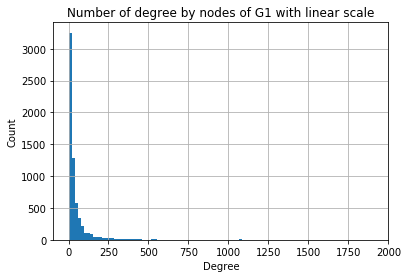

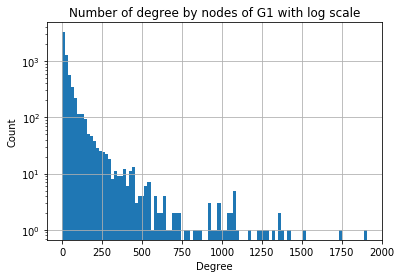

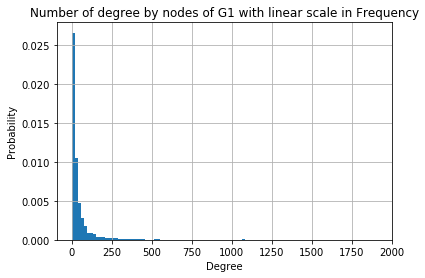

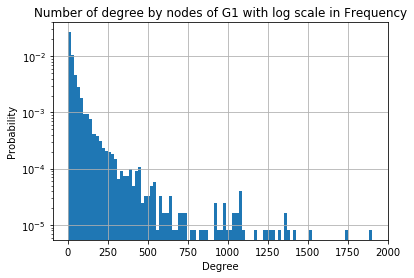

In [5]:
out_degrees = [find_out_degree(G, n) for n in G.nodes()]
nx_hist(out_degrees, bins=100, normed = False, yscale = 'linear', title = 'Number of degree by nodes of G1 with linear scale', xlabel = 'Degree', ylabel = 'Count')
nx_hist(out_degrees, bins=100, normed = False, yscale = 'log', title = 'Number of degree by nodes of G1 with log scale', xlabel = 'Degree', ylabel = 'Count')
nx_hist(out_degrees, bins=100, normed = True, yscale = 'linear', title = 'Number of degree by nodes of G1 with linear scale in Frequency', xlabel = 'Degree', ylabel = 'Count')
nx_hist(out_degrees, bins=100, normed = True, yscale = 'log', title = 'Number of degree by nodes of G1 with log scale in Frequency', xlabel = 'Degree', ylabel = 'Count')

We can see on those distributions that there is a pike at the origin, which is normal. The distribution seems to decrease exponentially, this is what we can expected with such a network. Indeed, the more there is degrees (more a character appears in comics with other different characters) the less it is likely.

However we can see that there is some character that have really high degree (around 1750 and 1850). We can think that these nodes are character from Avengers such as the famous Captain America or Iron Man which are the most popular character from the marvel universe. Furthermore, those characters met a lot of villains, this is why their degree should be higher.

### Clustering

In [6]:
cluster = nx.clustering(G)
cluster

{'LITTLE, ABNER': 0.6017316017316018,
 'PRINCESS ZANDA': 0.9272727272727272,
 "BLACK PANTHER/T'CHAL": 0.14651056833264,
 'STEELE, SIMON/WOLFGA': 0.75,
 'FORTUNE, DOMINIC': 0.5904761904761905,
 'ERWIN, CLYTEMNESTRA': 0.3639344262295082,
 'IRON MAN/TONY STARK': 0.06208173293193536,
 'IRON MAN IV/JAMES R.': 0.1532814238042269,
 'RAVEN, SABBATH II/EL': 0.6363636363636364,
 'CARNIVORE/COUNT ANDR': 0.6383838383838384,
 'GHOST': 0.4689075630252101,
 'ZIMMER, ABE': 0.4405320813771518,
 'FU MANCHU': 0.37630662020905925,
 'TARR, BLACK JACK': 0.36551724137931035,
 'SMITH, SIR DENIS NAY': 0.3862433862433862,
 'SHANG-CHI': 0.28221472315960505,
 'STARSHINE II/BRANDY': 0.2732384081781672,
 'ROM, SPACEKNIGHT': 0.34381051175656985,
 'MAN-THING/THEODORE T': 0.2918989646148595,
 'WU, LEIKO': 0.44714587737843553,
 'DOCTOR DREDD': 0.6153846153846154,
 'RESTON, CLIVE': 0.3548387096774194,
 'JACKSON, STEVE': 0.37183098591549296,
 'MYSTIQUE/RAVEN DARKH': 0.20370108590888647,
 'BLOB/FRED J. DUKES': 0.205091145

In [7]:
print('The average clustering coefficient of Graph :',nx.average_clustering(G))

The average clustering coefficient of Graph : 0.7746388327669077


In [8]:
print('The transitivity of the network:',nx.transitivity(G))

The transitivity of the network: 0.1947885118885619


In [9]:
print('The density of network:',nx.density(G))

The density of network: 0.008107742265085212


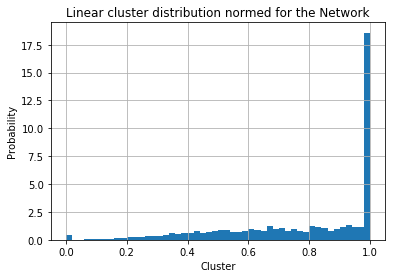

In [10]:
nx_hist(dict(cluster).values(), bins=50, normed = True, yscale = 'linear', title = 'Linear cluster distribution normed for the Network', xlabel = 'Cluster', ylabel = 'Count')

The average clustering coefficient is really important almost $80\%$. This means that characters tend to group a lot together. Which it is what we could expected because in the marvel universe, they love to gather every hero together against different villains. This is why the definition "your friends, are also your friend’s friends" works very well here. This is like the Facebook network (with the node as an account and the link as a friendship relation).

The transitivity (or overall) of a cluster give the probability that if two nodes, connected to a third one, are connecting together. The transitivity is not that big (almost $20\%$). This is quite unexpected, because we could think that the marvel comics tend to cluster the character as the movies (for example there is in one part the Avengers on in the other part the X-men). However, we can maybe explain that by the fact that there are some nodes with really high degree. These nodes will be connected with a lot of characters, but the characters will may be not be connected together. For example, Quicksilver and Scarlet Witch are both Avengers and X-men but characters from these two universes are not connected.

The density is really low, but it's what we can expected with this network. Indeed since $D=\frac{L}{L_{max}}$, because $n=6421$, $L_{max}>>L$. Therefore, we can't really analyze this value.

The transitivity and the density disagree with the average clustering, but this is explained by the cluster distribution. Indeed, if we look at the distribution there is a high pike at almost 1, but almost nothing anywhere else. This is why it's a little bit unbiased and the three measures are really different.

### Reduction of the Network

For the rest of my analysis, I want to reduce my network. Indeed, I want to compute some interesting measure (such as the diameter or the average shortest path) but my network is too big and it's taking too long to compute them. This is why I decided to work with subgraph.

In [11]:
G_GCC = max(nx.connected_component_subgraphs(G),key=len)
print('Giant Connected Component of the Network')
print(nx.info(G_GCC))

Giant Connected Component of Graph
Name: 
Type: Graph
Number of nodes: 6403
Number of edges: 167056
Average degree:  52.1805


First, I tried to reduce the network by taking only the giant connected component of the network. However, as we can see there is still $6403$ nodes which is still huge. However, thanks to this information we can conclude that only few nodes a not connected with the others, and it's a really high connected network. 

In [12]:
sorted_G = sorted(G_GCC.degree, key=lambda x: x[1], reverse=True)

G_highest_degree = sorted_G[:500]

G_highest_degree = [x[0] for x in G_highest_degree]

G_copy = G_GCC.copy()
G_reduct = G.subgraph(G_highest_degree)
print(nx.info(G_reduct))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 39244
Average degree: 156.9760


Therefore, to reduce the network i decided to work with the nodes that have the highest degree. I took the $500$ characters that have the more link with other characters. This network is still quite huge because there is almost $40,000$ edges. Furthermore, we can see that the average degree now is $157$. It means that a character is average connected with $30\%$ other characters of the network. There is a strong relation between the characters. But as I said before it is usual in the marvel universe.

### Analysis on the Path

In [13]:
print('Diameter of GCC:',nx.diameter(G_reduct))

Diameter of GCC: 3


The diameter is the longest shortest path among all nodes in a network. Therefore, as we said before the marvel-network looks like the Facebook-network. Indeed, we only need to reach the friends of my friends’ friends to cover all the network. This almost like in the Facebook network (the diameter is around 4). It means that if we look at 3 connected characters it's possible that we reach all the networks only by the links that have those 3 characters. 

In [14]:
print('Average shortest path length of GCC:',nx.average_shortest_path_length(G_reduct))

Average shortest path length of GCC: 1.6854589178356714


The average shortest path is almost half of the diameter. In average we almost need to reach only the friends of my friends to reach all the network. It's mean that with only 2 characters that appear in the same comics we have maybe chose two characters that appear with all the other characters in other comics. 

In [21]:
def shortest_path_per_node(G):
    list_nodes = list(G.nodes)
    shortest_path = []
    for i in range(0,len(list_nodes)-1):
        shortest_path.append((list_nodes[i],np.mean(list(nx.single_source_dijkstra(G,list_nodes[i])[0].values()))))
    shortest_path = sorted(shortest_path, key=lambda x: x[1], reverse=True)
    inverse=shortest_path[::-1]
    return(shortest_path[0:10],inverse[0:10])

G_highest_shortest_path, G_lowest_shortest_path = shortest_path_per_node(G_reduct)
G_highest_shortest_path=[x[0] for x in G_highest_shortest_path]
G_lowest_shortest_path=[x[0] for x in G_lowest_shortest_path]

print('The 10 nodes with the highest shortest path length for network')
print(G_highest_shortest_path)
print('')
print('The 10 nodes with the lowest shortest path length for network')
print(G_lowest_shortest_path)

The 10 nodes with the highest shortest path length for network
['TOMBSTONE/LONNIE THO', 'MERRYWEATHER, IRENE', 'M', 'STACY, JILL', 'PENANCE/MONET ST. CR', 'ROBERTSON, RANDY', 'ROBERTSON, MARTHA', 'CAPTAIN MARVEL III/G', 'VENOM/EDDIE BROCK', 'COUNT NEFARIA, LUCHI']

The 10 nodes with the lowest shortest path length for network
['CAPTAIN AMERICA', 'MR. FANTASTIC/REED R', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'SPIDER-MAN/PETER PAR', 'HUMAN TORCH/JOHNNY S', 'WOLVERINE/LOGAN', 'THOR/DR. DONALD BLAK', 'INVISIBLE WOMAN/SUE', 'BEAST/HENRY &HANK& P']


With this function we show first 10 characters that have the highest shortest path length (it means 3, as the diameter), then we show those who have the lowest shortest path length.

After some research, most of the characters that have the highest shortest path length didn't appear in any movie. This is what we can expect to. Because it means that they are not really connected to the rest of the network, therefor they don't have strong relation with the other marvel heroes. This is why they don't appear (at least yet) in the movie. However, we can see that there is Venom and Captain Marvel, and both of them have a special movie for them. But Venom is not a movie from Marvel Studio and in this movie, we don't see any other famous character from the universe marvel, therefore is not that unexpected. However, for Captain Marvel it's more surprising. Indeed, now she has a movie from Marvel Studio and we saw on the trailer of 'Avengers: ENDGAME', that she will be there too, and therefore will appear with every heroes. But it's 'CAPTAIN MARVEL III/G', we can thing that there is different Captain Marvel in the comics and this Marvel in one of the last version of the character and so she is not related with a lot of character because she didn't have the time to appear in a lot of comics.

If we look at the 10 characters who have the lowest shortest path length, we saw characters that we are really familiar too. Indeed there is some of the avengers (Captain America, Iron Man, Thor), the famous Spiderman (he has 3 versions of his history in the movie-universe, with the last one from Marvel Studio to introduce him into the Avengers), the most famous X-men Wolverine (he appears in 9 movies with 3 only about him), the 4 Fantastic (MR. Fantastic, Thing, Human Torch, Invisible Woman). However, those 3 universes (Avengers, X-men and 4 Fantastic) aren't connected in the cinema, therefore those characters may represent the most important characters from their own universe. However, there is one unexpected character: Beast (which is part from the X-men). We saw his history in the movie: 'X-men: The Beginning', but we didn't talk that much about him. Maybe he will become an important character later. 

In [22]:
sorted_G = sorted(G_reduct.degree, key=lambda x: x[1], reverse=True)

G_highest_degree = sorted_G[:10]

G_highest_degree = [x[0] for x in G_highest_degree]

G_lowest_degree = sorted_G[-10:]

G_lowest_degree = [x[0] for x in G_lowest_degree]

print('The 10 nodes with the highest degree for network')
print(G_highest_degree)
print('')
print('The 10 nodes with the lowest degree for network')
print(G_lowest_degree)
print('')

The 10 nodes with the highest degree for network
['CAPTAIN AMERICA', 'MR. FANTASTIC/REED R', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'SPIDER-MAN/PETER PAR', 'HUMAN TORCH/JOHNNY S', 'WOLVERINE/LOGAN', 'THOR/DR. DONALD BLAK', 'INVISIBLE WOMAN/SUE', 'BEAST/HENRY &HANK& P']

The 10 nodes with the lowest degree for network
['COUNT NEFARIA, LUCHI', 'CAPTAIN MARVEL III/G', 'ROBERTSON, RANDY', 'ROBERTSON, MARTHA', 'PENANCE/MONET ST. CR', 'MADAME MASQUE/GIULIE', 'STACY, JILL', 'M', 'MERRYWEATHER, IRENE', 'TOMBSTONE/LONNIE THO']



Here we show the most and the less important characters in term of nodes. As we can see it's really close from the measure shortest path. Actually, for the nodes with the highest degree it's the same characters. Therefore, is not too much to say about it.

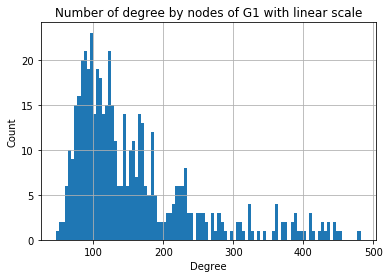

In [17]:
out_degrees_reduct = [find_out_degree(G_reduct, n) for n in G_reduct.nodes()]
nx_hist(out_degrees_reduct, bins=100, normed = False, yscale = 'linear', title = 'Number of degree by nodes of G1 with linear scale', xlabel = 'Degree', ylabel = 'Count')

Here I plot the distribution of the degree. As before we can see that it decreases exponentially. However, the high pike is at $100$ not in $0$ as before. But this is normal since we keep only the highest degree. We can see that there are some characters that are almost connected with everybody.

### Analysis on centrality measures

In [18]:
liste_new = [nx.degree_centrality(G_reduct),
            nx.closeness_centrality(G_reduct),
            nx.betweenness_centrality(G_reduct),
            nx.pagerank(G_reduct),
            nx.eigenvector_centrality(G_reduct),]

In [46]:
many = 10
number = 5*many
dico = {'Character':[0]*number,"deg":['']*number , 'closeness':['']*number, 'between':['']*number, 'pagerank':['']*number, 'eigenvector':['']*number}
df_max = pd.DataFrame(data=dico)

k = 0
l = 1
for i in range (5):
    liste_sort = sorted(liste_new[i].items(), key=operator.itemgetter(1) , reverse = True)   
    for j in range(many):
        index = liste_sort[j]
        #import pdb; pdb.set_trace()
        df_max.iloc[j+k,df_max.columns.get_loc('Character')] = index[0]
        df_max.iloc[j+k,l] = index[1]
    l = l + 1
    k = k + many

    
#for key in dico:
#    if (key != 'Character'):
#        print ('the Top 10 character according to the measure', key, 'are :')
#        print(df_max.loc[(df_max.loc[:,key]!='')][['Character',key]])
#        print('')

In [53]:
print ('the Top 10 character according to the centrality measure degree are :')
df_max.iloc[0:10]

the Top 10 character according to the centrality measure degree are :


,Character,deg,closeness,between,pagerank,eigenvector
0,CAPTAIN AMERICA,0.967936,,,,
1,MR. FANTASTIC/REED R,0.905812,,,,
2,IRON MAN/TONY STARK,0.903808,,,,
3,THING/BENJAMIN J. GR,0.893788,,,,
4,SPIDER-MAN/PETER PAR,0.88978,,,,
5,HUMAN TORCH/JOHNNY S,0.873747,,,,
6,WOLVERINE/LOGAN,0.871743,,,,
7,THOR/DR. DONALD BLAK,0.867735,,,,
8,INVISIBLE WOMAN/SUE,0.855711,,,,
9,BEAST/HENRY &HANK& P,0.853707,,,,


With this centrality measure we measure the important a character thank to his degree. Therefore we find out the same characters as before when we analyze the degree distribution.

In [54]:
print ('the Top 10 character according to the centrality measure closeness are :')
df_max.iloc[10:20]

the Top 10 character according to the centrality measure closeness are :


,Character,deg,closeness,between,pagerank,eigenvector
10,CAPTAIN AMERICA,,0.965184,,,
11,MR. FANTASTIC/REED R,,0.913919,,,
12,IRON MAN/TONY STARK,,0.912249,,,
13,THING/BENJAMIN J. GR,,0.903986,,,
14,SPIDER-MAN/PETER PAR,,0.900722,,,
15,HUMAN TORCH/JOHNNY S,,0.8879,,,
16,WOLVERINE/LOGAN,,0.886323,,,
17,THOR/DR. DONALD BLAK,,0.883186,,,
18,INVISIBLE WOMAN/SUE,,0.873905,,,
19,BEAST/HENRY &HANK& P,,0.872378,,,


The closeness centrality measure is the inverse of average distance to all other nodes in the network. As before we find out the same characters as the degree centrality measure. Indeed, previously we said that the character with the lowest shortest path are the same as the character with the highest degree. So, it's normal that we figure out the same characters.

In [55]:
print ('the Top 10 character according to the centrality measure betweeness are :')
df_max.iloc[20:30]

the Top 10 character according to the centrality measure betweeness are :


,Character,deg,closeness,between,pagerank,eigenvector
20,CAPTAIN AMERICA,,,0.0169501,,
21,MR. FANTASTIC/REED R,,,0.0140604,,
22,IRON MAN/TONY STARK,,,0.0135114,,
23,SPIDER-MAN/PETER PAR,,,0.0134315,,
24,THING/BENJAMIN J. GR,,,0.0130504,,
25,WOLVERINE/LOGAN,,,0.0124426,,
26,HUMAN TORCH/JOHNNY S,,,0.0121553,,
27,THOR/DR. DONALD BLAK,,,0.0120651,,
28,BEAST/HENRY &HANK& P,,,0.0117775,,
29,INVISIBLE WOMAN/SUE,,,0.011404,,


The betweenness centrality measure is the number of shortest paths a character lies upon. With this measure we figure out the same characters, but they aren't in the same order. Indeed, they will have one or two characters from different universe they will be on the top to link every universe (Avengers, X-men, 4 Fantastic). This is why Spiderman and Wolverine go up in this ranking.

In [56]:
print ('the Top 10 character according to the centrality measure pagerank are :')
df_max.iloc[30:40]

the Top 10 character according to the centrality measure pagerank are :


,Character,deg,closeness,between,pagerank,eigenvector
30,CAPTAIN AMERICA,,,,0.00568784,
31,MR. FANTASTIC/REED R,,,,0.00533202,
32,IRON MAN/TONY STARK,,,,0.00531281,
33,THING/BENJAMIN J. GR,,,,0.00525575,
34,SPIDER-MAN/PETER PAR,,,,0.00523495,
35,HUMAN TORCH/JOHNNY S,,,,0.0051376,
36,WOLVERINE/LOGAN,,,,0.00512299,
37,THOR/DR. DONALD BLAK,,,,0.00510372,
38,INVISIBLE WOMAN/SUE,,,,0.0050317,
39,BEAST/HENRY &HANK& P,,,,0.00502013,


The pagerank centrality measure says a character is important when it is likely to be randomly walked to by the other characters. Here again we find out the same characters in the same order as before. But it's normal since they are the characters with the highest degree and the lowest shortest path, therefore they are more likely to be randomly walked to.

In [57]:
print ('the Top 10 character according to the centrality measure eigenvector are :')
df_max.iloc[40:50]

the Top 10 character according to the centrality measure eigenvector are :


,Character,deg,closeness,between,pagerank,eigenvector
40,CAPTAIN AMERICA,,,,,0.100194
41,MR. FANTASTIC/REED R,,,,,0.0960908
42,IRON MAN/TONY STARK,,,,,0.0960651
43,THING/BENJAMIN J. GR,,,,,0.0953574
44,SPIDER-MAN/PETER PAR,,,,,0.0949494
45,HUMAN TORCH/JOHNNY S,,,,,0.0939662
46,WOLVERINE/LOGAN,,,,,0.0938074
47,THOR/DR. DONALD BLAK,,,,,0.0932854
48,INVISIBLE WOMAN/SUE,,,,,0.0926813
49,SCARLET WITCH/WANDA,,,,,0.0925348


The eigenvector centrality says a character is important when its neighbor-characters are important. Here we find out again the same characters but with a small difference: Scarlet With took the place of Beast. This is what we can expected indeed, here there is still the most important character from the different universes (the 4 fantastic are here, therefore the eigenvector is important because they always work in team), the most important avengers are here (same as the 4 Fantastic). However only one X-men is there, therefore the neighborhood of the X-men is not that important, so Beast disappears. Furthermore, Scarlet Witch is an Avenger and an X-men therefore it's normal that her eigenvector is high because her neighborhood is important.

### First Conclusion

From this first analysis we show that the network of the marvel characters is highly connected, and the main characters are really important in the comics. Indeed, we always pointed out the same characters from our analysis. However, we never point out any villains as important nodes. This can be explained because when a villain is beat by heroes, he can't meet another hero. But we could think of important villains in the movies such as Red Skull or Thanos. Furthermore, we saw that there are some really important characters but if we compare with the actual movie, they are not connected at all for now. For example, Wolverine never appear with one of the Avengers, and even the 4 Fantastic (which have 2 versions of them in movies) don't have any link with other characters.

This is why I decided to make a more advanced analysis with the characters that we already saw in movies to see if we can forecast something after 'Avengers: ENDGAME'.